In [126]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM

In [127]:
# FOR REPRODUCIBILITY
np.random.seed(7)

In [128]:
# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET
def new_dataset(dataset, step_size):
    data_X, data_Y = [], []
    for i in range(len(dataset)-step_size-1):
        a = dataset[i:(i+step_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + step_size, 0])
    return np.array(data_X), np.array(data_Y)

In [129]:
# IMPORTING DATASET 
dataset = pd.read_csv(r'C:\Users\DELL PC\Desktop\DV Review 3\Stock Price Data Companies\AARTIDRUGS.NS.csv', usecols=[1,2,3,4])

In [130]:
dataset

,Open,High,Low,Close
0,10.643800,11.062500,10.125000,10.675000
1,10.775000,11.206300,10.775000,11.187500
2,11.487500,11.737500,11.312500,11.631300
3,11.750000,11.750000,11.262500,11.362500
4,11.312500,11.600000,11.175000,11.193800
...,...,...,...,...
4238,793.349976,805.000000,770.200012,772.299988
4239,776.000000,804.900024,760.000000,778.700012
4240,793.700012,793.700012,761.000000,769.099976
4241,769.099976,769.950012,735.099976,747.849976


In [131]:
print('Before dropping:\n', dataset.isna().sum(), sep = '')
dataset.dropna(axis = 0, how = 'any', inplace = True)
print('\nAfter dropping:\n', dataset.isna().sum(), sep = '')

Before dropping:
Open     15
High     15
Low      15
Close    15
dtype: int64

After dropping:
Open     0
High     0
Low      0
Close    0
dtype: int64


In [132]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(dataset) + 1, 1)

# TAKING DIFFERENT INDICATORS FOR PREDICTION
OHLC_avg = dataset.mean(axis = 1)
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]

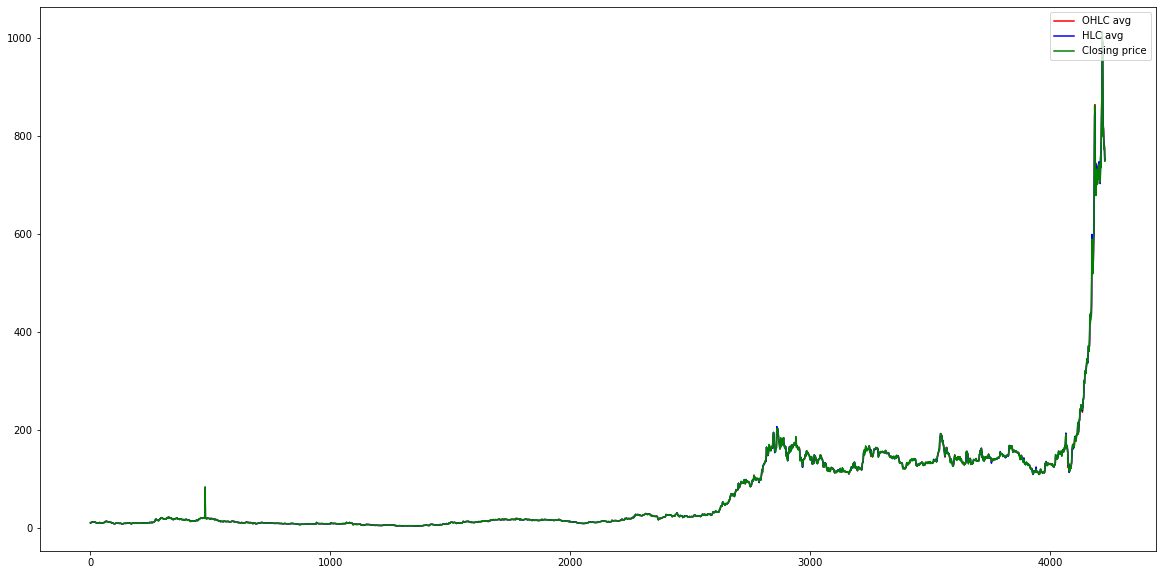

In [133]:
# PLOTTING ALL INDICATORS IN ONE PLOT
plt.figure(figsize=(20,10))
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()

In [134]:
# PREPARATION OF TIME SERIES DATASE
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)

In [115]:
# TRAIN-TEST SPLIT
train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = new_dataset(train_OHLC, 1)
testX, testY = new_dataset(test_OHLC, 1)

# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1

In [116]:
trainX

array([[[0.02745411]],

       [[0.02654504]],

       [[0.02631904]],

       [[0.02531889]],

       [[0.02848651]],

       [[0.02819319]],

       [[0.02840533]],

       [[0.02926066]],

       [[0.02651364]],

       [[0.02800934]],

       [[0.02830973]],

       [[0.02675067]],

       [[0.02853233]],

       [[0.02842626]],

       [[0.02721398]],

       [[0.02668674]],

       [[0.02556978]],

       [[0.02599037]],

       [[0.02574627]],

       [[0.02570073]],

       [[0.02670796]],

       [[0.0274329 ]],

       [[0.02661575]],

       [[0.02649921]],

       [[0.02752143]],

       [[0.02725215]],

       [[0.02859965]],

       [[0.03324175]],

       [[0.03383941]],

       [[0.03268653]],

       [[0.03295212]],

       [[0.03257027]],

       [[0.03331954]],

       [[0.03184194]],

       [[0.03393502]],

       [[0.03513005]],

       [[0.03303669]],

       [[0.03156249]],

       [[0.03139645]],

       [[0.02953304]],

       [[0.03173926]],

       [[0.03151

In [117]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adam') # Try SGD, adam, adagrad and compare!!!

In [118]:
model.fit(trainX, trainY, epochs=6, batch_size=1, verbose=2)

Epoch 1/6
554/554 - 1s - loss: 2.5464e-04
Epoch 2/6
554/554 - 1s - loss: 5.8477e-05
Epoch 3/6
554/554 - 1s - loss: 1.1549e-05
Epoch 4/6
554/554 - 1s - loss: 1.2248e-05
Epoch 5/6
554/554 - 1s - loss: 1.2030e-05
Epoch 6/6
554/554 - 1s - loss: 1.2525e-05


In [119]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [120]:
# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [121]:
# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

Train RMSE: 3.23


In [122]:
# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

Test RMSE: 23.71


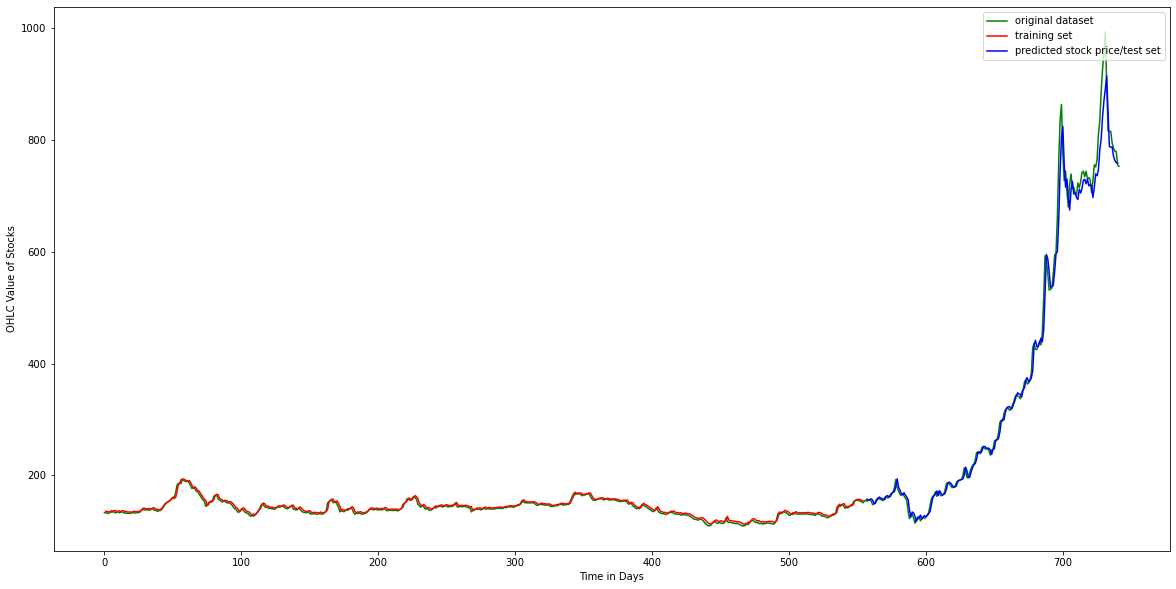

In [123]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg)

# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.figure(figsize=(20,10))
plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Stocks')
plt.show()

In [124]:
# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print("Last Day Value:", np.asscalar(last_val))
print("Next Day Value:", np.asscalar(last_val*next_val))
# print np.append(last_val, next_val)

Last Day Value: 758.7900390625
Next Day Value: 691.369384765625


<ipython-input-124-07399bf6cb21>:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print("Last Day Value:", np.asscalar(last_val))
<ipython-input-124-07399bf6cb21>:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print("Next Day Value:", np.asscalar(last_val*next_val))


In [125]:
## 744.4